In [2]:
import os
import cv2 #pip3 install opencv-python

import random

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.gridspec as gridspec
from PIL import Image, ImageOps, ImageFilter, ImageEnhance  #PILLOW
from math import floor, ceil, pi
import numpy as np 

In [35]:
path = os.path.join("..","original-dataset","masks",'003.png')
fig = plt.figure(figsize=(20, 10))#(width,height)
#PILLOW
img=Image.open(path)#PILLOW
x,y= img.size
print(x," ", y)
width, height = img.size   # Get dimensions
f = 1.5
left = width/f
top = height/f
right = 3 * width/f
bottom = 3 * height/f
img = img.crop((left, top, right, bottom))
img = img.resize(x,y)

#cropped_example.show()

ax = fig.add_subplot(1, 2, 1)
ax.title.set_text('pillow')
plt.imshow(img)

#CV2
img = cv2.imread(path,  cv2.IMREAD_COLOR) #CV2
#img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV )
img = cv2.normalize(img, None, alpha = 0, beta = 255, norm_type = cv2.NORM_MINMAX, dtype=cv2.CV_32F)


ax = fig.add_subplot(1, 2, 2)
ax.title.set_text('cv2')
plt.imshow(img)


900   368


ValueError: Unknown resampling filter (368). Use Image.Resampling.NEAREST (0), Image.Resampling.LANCZOS (1), Image.Resampling.BILINEAR (2), Image.Resampling.BICUBIC (3), Image.Resampling.BOX (4) or Image.Resampling.HAMMING (5)

<Figure size 2000x1000 with 0 Axes>

In [16]:
import cv2

from typing import Tuple
def resize_with_pad(image: np.array, 
                    new_shape: Tuple[int, int], 
                    padding_color: Tuple[int] = (0,0,0)) -> np.array:
    """Maintains aspect ratio and resizes with padding.
    Params:
        image: Image to be resized.
        new_shape: Expected (width, height) of new image.
        padding_color: Tuple in BGR of padding color
    Returns:
        image: Resized image with padding
    """
    original_shape = (image.shape[1], image.shape[0])
    ratio = float(max(new_shape))/max(original_shape)
    new_size = tuple([int(x*ratio) for x in original_shape])
    image = cv2.resize(image, new_size)
    delta_w = new_shape[0] - new_size[0]
    delta_h = new_shape[1] - new_size[1]
    top, bottom = delta_h//2, delta_h-(delta_h//2)
    left, right = delta_w//2, delta_w-(delta_w//2)
    image = cv2.copyMakeBorder(image, top, bottom, left, right, cv2.BORDER_CONSTANT, value=padding_color)
    return image

75
76
77
78
79
80
81
82
83
84
75
76
77
78
79
80
81
82
83
84
75
w: 256 x h: 256
76
w: 256 x h: 256
77
w: 256 x h: 256
78
w: 256 x h: 256
79
w: 256 x h: 256
80
w: 256 x h: 256
81
w: 256 x h: 256
82
w: 256 x h: 256
83
w: 256 x h: 256
84
w: 256 x h: 256
75
w: 256 x h: 256
76
w: 256 x h: 256
77
w: 256 x h: 256
78
w: 256 x h: 256
79
w: 256 x h: 256
80
w: 256 x h: 256
81
w: 256 x h: 256
82
w: 256 x h: 256
83
w: 256 x h: 256
84
w: 256 x h: 256


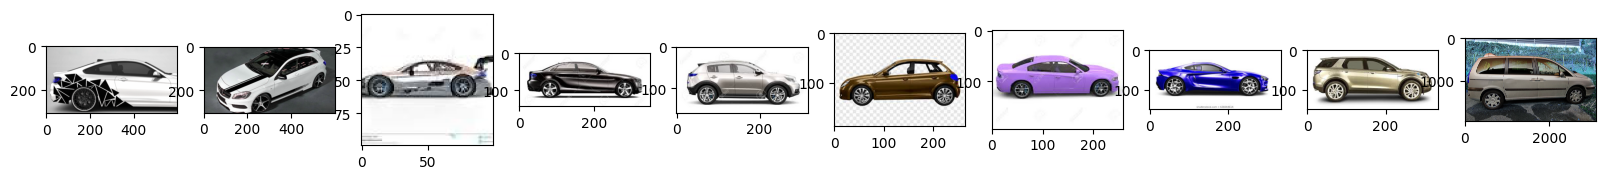

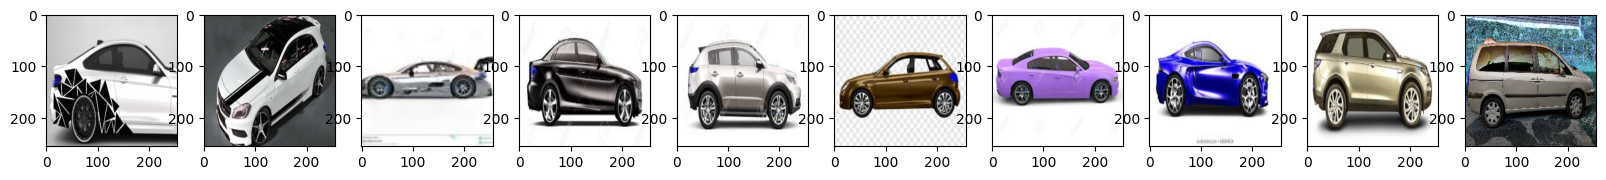

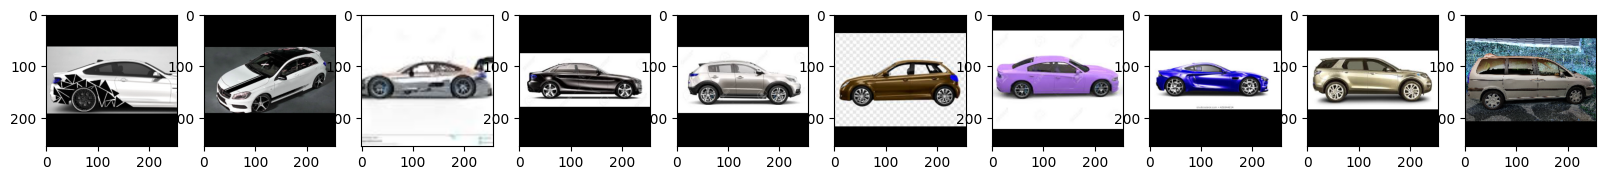

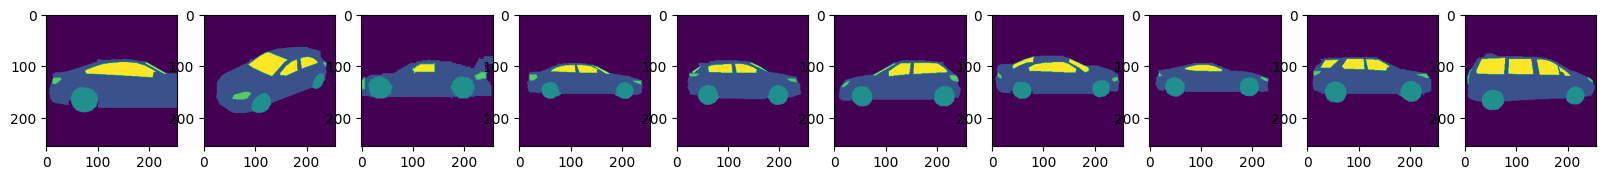

In [17]:
#PROVA DI RESIZING CON PADDING
import os
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
parent = ".." #parent directory
img_folder = os.path.join(parent, "original-dataset", "images")
masks_folder = os.path.join(parent, "original-dataset", "masks")
fig = plt.figure(figsize=(20, 20))#(width,height)
y = 1
for i in range(75,85):
    print(i)
    file = os.listdir(img_folder)[i]
    image_path= os.path.join(img_folder, file)
    img=cv2.imread(image_path)
    height, width, channels = img.shape
    #print(f"w: {width} x h: {height}")
    ax = fig.add_subplot(1, 10, y)
    plt.imshow(img)
    
    y = y +1
    
y = 1
fig = plt.figure(figsize=(20, 20))#(width,height)
for i in range(75,85):
    print(i)
    file = os.listdir(img_folder)[i]
    image_path= os.path.join(img_folder, file)
    img=cv2.imread(image_path)
    img = cv2.resize(img, (256,256))
    height, width, channels = img.shape
    #print(f"w: {width} x h: {height}")
    ax = fig.add_subplot(1, 10, y)
    plt.imshow(img)
    
    y = y +1
    
y = 1
fig = plt.figure(figsize=(20, 20))#(width,height)
for i in range(75,85):
    print(i)
    file = os.listdir(img_folder)[i]
    image_path= os.path.join(img_folder, file)
    img=cv2.imread(image_path)
    #img =np.array(img)
    img = resize_with_pad(img, (256, 256))
    height, width, channels = img.shape
    print(f"w: {width} x h: {height}")
    ax = fig.add_subplot(1, 10, y)
    plt.imshow(img)
    y = y +1
    
y = 1
fig = plt.figure(figsize=(20, 20))#(width,height)
for i in range(75,85):
    print(i)
    file = os.listdir(img_folder)[i]
    image_path= os.path.join(masks_folder, file)
    img=cv2.imread(image_path)
    img = resize_with_pad(img, (256, 256))
    height, width, channels = img.shape
    print(f"w: {width} x h: {height}")
    ax = fig.add_subplot(1, 10, y)
    plt.imshow(img[:,:,0])
    y = y +1